

## Nom: PAYANG
### Prenom: HONORE

##### SECURITE RESEAU 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [71]:
data = pd.read_csv('Titanic-Dataset - Titanic-Dataset.csv')

In [72]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
data.shape

(891, 12)

<Axes: >

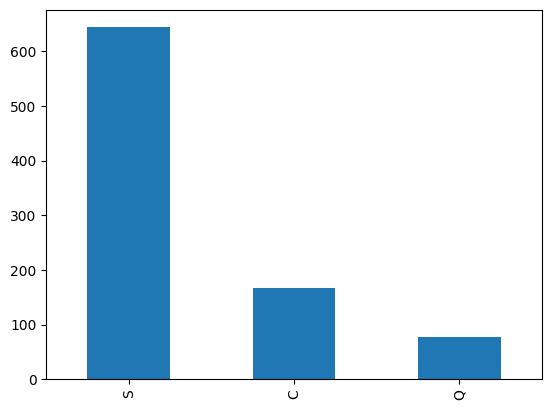

In [74]:
data.Embarked.value_counts().plot(kind='bar')

In [75]:
#  2: Nettoyage des données

# Supprimez les colonnes non nécessaires, encodez les variables catégoriques, et supprimez les valeurs manquantes
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data = data.dropna()

In [76]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [77]:
data.isnull().values.any()

False

In [78]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826,-0.049549,-0.164235
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460,0.132415,0.203980
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950,0.051619,0.021751
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972,-0.009126,0.015833
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994,-0.062765,-0.253991
Sex_male,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000,-0.026440,0.115167
Embarked_Q,-0.049549,0.132415,-0.022405,0.051619,-0.009126,-0.062765,-0.026440,1.000000,-0.375934
Embarked_S,-0.164235,0.203980,-0.032523,0.021751,0.015833,-0.253991,0.115167,-0.375934,1.000000


<Axes: >

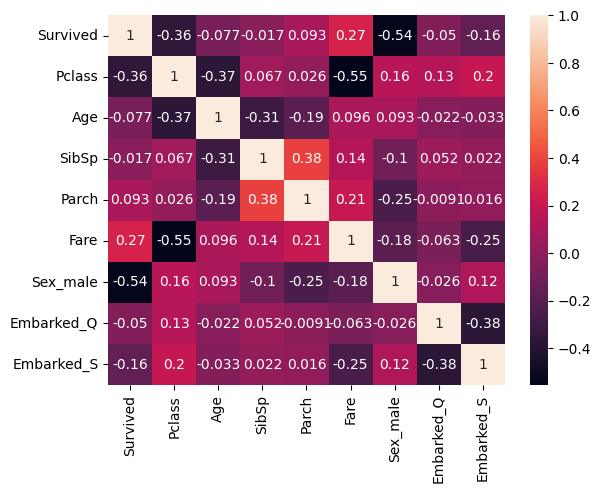

In [79]:
sns.heatmap(data.corr(), annot=True)

In [80]:
print(data.head(10))

    Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0          0       3  22.0      1      0   7.2500         1           0   
1          1       1  38.0      1      0  71.2833         0           0   
2          1       3  26.0      0      0   7.9250         0           0   
3          1       1  35.0      1      0  53.1000         0           0   
4          0       3  35.0      0      0   8.0500         1           0   
6          0       1  54.0      0      0  51.8625         1           0   
7          0       3   2.0      3      1  21.0750         1           0   
8          1       3  27.0      0      2  11.1333         0           0   
9          1       2  14.0      1      0  30.0708         0           0   
10         1       3   4.0      1      1  16.7000         0           0   

    Embarked_S  
0            1  
1            0  
2            1  
3            1  
4            1  
6            1  
7            1  
8            1  
9            0  
10  

In [81]:
#  3: Équilibrage de l'ensemble de données par sous-échantillonnage

from sklearn.utils import resample

In [82]:
# Séparez les classes majoritaires et minoritaires
majority_class = data[data['Survived'] == 0]
minority_class = data[data['Survived'] == 1]


In [83]:
# Sous-échantillonnage de la classe majoritaire
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)


In [84]:

# Fusionnez les classes équilibrées
data_balanced = pd.concat([majority_downsampled, minority_class])

# Vérifiez la distribution des classes après l'équilibrage
print(data_balanced['Survived'].value_counts())


0    290
1    290
Name: Survived, dtype: int64


Axes(0.22375,0.11;0.5775x0.77)


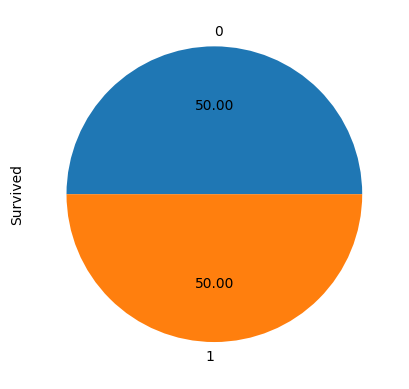

In [85]:
print(data_balanced['Survived'].value_counts().plot.pie(autopct="%.2f"))

In [86]:
# 4: Créez un modèle KNN

from sklearn.neighbors import KNeighborsClassifier

X = data_balanced.drop('Survived', axis=1)
y = data_balanced['Survived']

# Initialisez le modèle KNN
knn_model = KNeighborsClassifier()


In [87]:
# 5: Évaluez le modèle avec la validation croisée

from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Définissez les métriques à évaluer
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

# Effectuez la validation croisée
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=scoring)

# Calculez les moyennes des métriques
accuracy_mean = np.mean(cv_results['test_accuracy'])
precision_mean = np.mean(cv_results['test_precision'])
recall_mean = np.mean(cv_results['test_recall'])
f1_mean = np.mean(cv_results['test_f1'])

# Affichez les résultats
print(f'Accuracy: {accuracy_mean}')
print(f'Precision: {precision_mean}')
print(f'Recall: {recall_mean}')
print(f'F1 Score: {f1_mean}')

Accuracy: 0.6879310344827586
Precision: 0.6995931307403759
Recall: 0.6620689655172414
F1 Score: 0.6774384121774


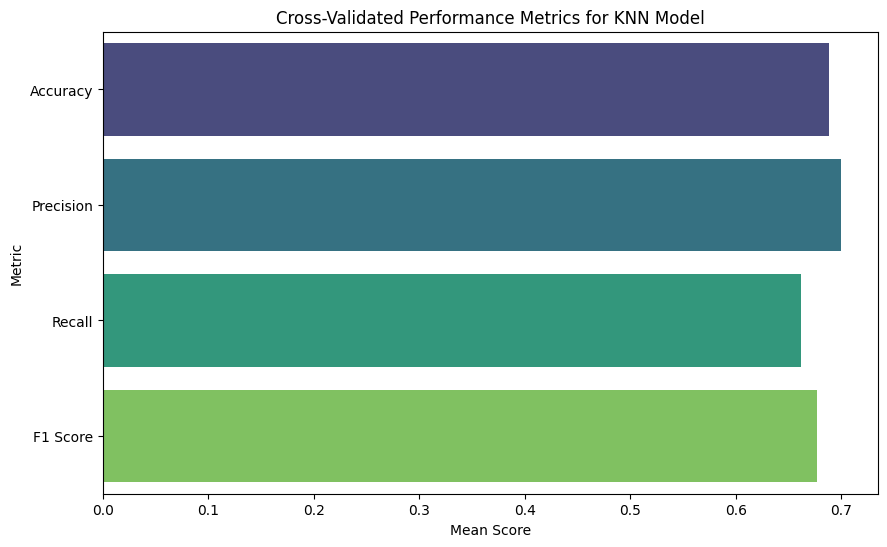

In [91]:
# 6: Visualisez les résultats de précision à l’aide d’un graphique

import matplotlib.pyplot as plt
import seaborn as sns

# Créez un DataFrame avec les résultats
results_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Mean Score': [accuracy_mean, precision_mean, recall_mean, f1_mean]})

# Visualisez les résultats
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Score', y='Metric', data=results_df, palette='viridis')
plt.title('Cross-Validated Performance Metrics for KNN Model')
plt.show()
